In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

C:\Users\Admin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [26]:
# Load dataset (IMDB 50K Movie Reviews)
df = pd.read_csv("IMDB Dataset.csv")

In [27]:
print(df['sentiment'].head())

0    positive
1    positive
2    positive
3    negative
4    positive
Name: sentiment, dtype: object


In [28]:
print(df['sentiment'].value_counts())
print(df['sentiment'].isnull().sum())

positive    25000
negative    25000
Name: sentiment, dtype: int64
0


In [11]:
pip install spacy

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.



  Using cached colorama-0.4.6-py2.py3-none-any.whl.metadata (17 kB)
   ---------------------------------------- 12.3/12.3 MB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 633.4/633.4 kB 2.7 MB/s eta 0:00:00
   ---------------------------------------- 1.5/1.5 MB 2.6 MB/s eta 0:00:00
   ---------------------------------------- 6.2/6.2 MB 2.2 MB/s eta 0:00:00
Using cached colorama-0.4.6-py2.py3-none-any.whl (25 kB)
   ---------------------------------------- 5.4/5.4 MB 2.0 MB/s eta 0:00:00
  Attempting uninstall: smart-open
    Found existing installation: smart-open 5.1.0
    Uninstalling smart-open-5.1.0:
      Successfully uninstalled smart-open-5.1.0
  Attempting uninstall: colorama
    Found existing installation: colorama 0.4.4
    Uninstalling colorama-0.4.4:
      Successfully uninstalled colorama-0.4.4


In [13]:
!python -m spacy download en_core_web_sm


     ---------------------------------------- 12.8/12.8 MB 1.4 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [14]:
import spacy
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])


In [15]:
from tqdm import tqdm
tqdm.pandas()

def preprocess_spacy(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove special characters & numbers
    doc = nlp(text.lower())  # Use spaCy for tokenization
    words = [token.text for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(words)

df['review'] = df['review'].progress_apply(preprocess_spacy)  # Add progress bar


100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [1:04:08<00:00, 12.99it/s]


In [24]:
df_preprocessed_review =df['review']

In [25]:
df_preprocessed_review

0        reviewers mentioned watching    oz episode ll ...
1        wonderful little production    br     br    fi...
2        thought wonderful way spend time hot summer we...
3        basically s family little boy   jake   thinks ...
4        petter mattei s   love time money   visually s...
                               ...                        
49995    thought movie right good job   wasn t creative...
49996    bad plot   bad dialogue   bad acting   idiotic...
49997    catholic taught parochial elementary schools n...
49998    m going disagree previous comment maltin   sec...
49999    expects star trek movies high art   fans expec...
Name: review, Length: 50000, dtype: object

In [30]:
df['sentiment'] = df['sentiment'].astype(str)
print(df['sentiment'].head())

0    positive
1    positive
2    positive
3    negative
4    positive
Name: sentiment, dtype: object


In [31]:
# Convert sentiment to binary labels
df['sentiment'] = df['sentiment'].str.lower().str.strip().map({'positive': 1, 'negative': 0})
print(df['sentiment'].head())

0    1
1    1
2    1
3    0
4    1
Name: sentiment, dtype: int64


In [34]:
# Create a new DataFrame with required columns
cleaned_df = pd.DataFrame({
    'review': df_preprocessed_review,  # Column 1: Preprocessed reviews
    'sentiment': df['sentiment']             # Column 2: Sentiment labels
})

# Save the cleaned DataFrame to a CSV file
cleaned_df.to_csv('cleaned_data.csv', index=False)

# Display the first few rows to verify
print(cleaned_df.head())


                                              review  sentiment
0  reviewers mentioned watching    oz episode ll ...          1
1  wonderful little production    br     br    fi...          1
2  thought wonderful way spend time hot summer we...          1
3  basically s family little boy   jake   thinks ...          0
4  petter mattei s   love time money   visually s...          1


In [36]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(cleaned_df['review'], df['sentiment'], test_size=0.2, random_state=42)


In [37]:
# Convert text into numerical vectors using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [41]:
print(y_train.dtype)  # Should be int or int64


int64


In [42]:
y_train = y_train.astype(int)


In [43]:
# Train Naïve Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [44]:
# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=500)

In [45]:
# Predictions
nb_pred = nb_model.predict(X_test_tfidf)
lr_pred = lr_model.predict(X_test_tfidf)

In [46]:
# Evaluate models
print("Naïve Bayes Performance:")
print(classification_report(y_test, nb_pred))
print("Accuracy:", accuracy_score(y_test, nb_pred))
print()

Naïve Bayes Performance:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4961
           1       0.85      0.86      0.86      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Accuracy: 0.8539



In [47]:
print("Logistic Regression Performance:")
print(classification_report(y_test, lr_pred))
print("Accuracy:", accuracy_score(y_test, lr_pred))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Accuracy: 0.8901


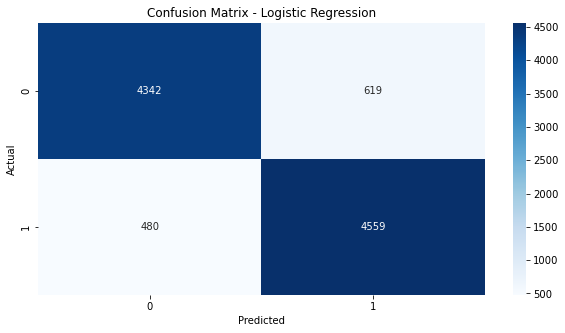

In [48]:
# Confusion Matrix
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()
